Interactive Plotting and Monte Carlo simulations of CPPI

In [28]:
import ipywidgets as widgets
from IPython.display import display 
import pandas as pd
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##GBM Interactive plots

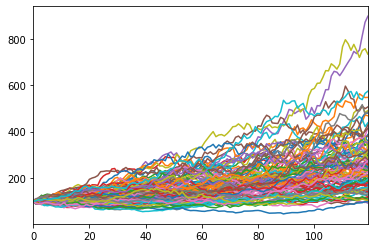

In [17]:
erk.gbm(10, 100, mu=0.1).plot(legend=False)

In [24]:
def show_gbm(n_scenarios, mu, sigma):
    """
    Draw the results of a stock price evolution under a Geometric Brownian Motion model
    """
    s_0=100
    prices=erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=s_0)
    ax=prices.plot(legend=False, color="indianred", alpha=0.5, linewidth=2, figsize=(12,5))
    ax.axhline(y=s_0, ls=":", color="black")
    ax.set_ylim(top=400)
    #draw a dot at the origin
    ax.plot(0, s_0, marker='o',color='darkred',alpha=0.2 )
    

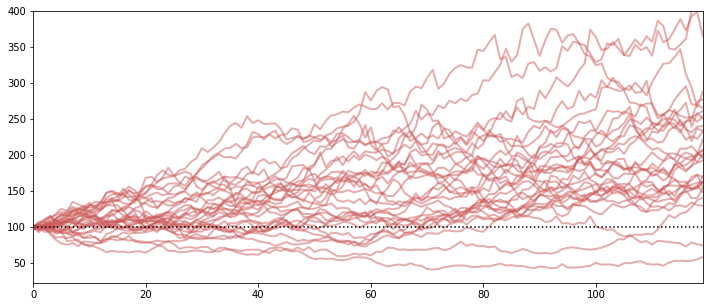

In [18]:
show_gbm(30,0.07, 0.15) # alpha is the transparency of the line

In [25]:
gbm_controls= widgets.interactive(show_gbm,
                                 n_scenarios=(1, 20, 1),
                                 mu=(-0.2,0.2,0.01),
                                 sigma=(0,0.3,0.01)   
                                 )
    

In [26]:
display (gbm_controls)

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.0, de…

In [34]:
# with mu close to zero there is no real growth 
#sigma controls the spread 
#sigma increases the range of outcomes
# my is the drift and and sigma is the volatility
#as we increase sigma, the spreas increases

Interactive CPPI simulation- Monte Carlo

In [37]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start=100
    sim_rets=erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma,prices=False, steps_per_year=12) #prices=False
    risky_r=pd.DataFrame(sim_rets)
    #run the "back" test
    btr=erk.run_cppi(risky_r=pd.DataFrame(risky_r),riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth=btr["Wealth"]
    y_max=wealth.values.max()*y_max/100
    ax=wealth.plot(legend=False, alpha=0.3, color="indianred", figsize=(12,6))
    ax.axhline(y=start, ls=":", color="black")
    ax.axhline(y=start*floor, ls="--", color="red")
    #ax.set_ylim(top=y_max)

cppi_controls=widgets.interactive(show_cppi,
                                  n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                  mu=(0., +.2, .01),
                                  sigma=(0, .30, .05),
                                  floor=(0,2, .1),
                                  m=(1,5, .5),
                                  riskfree_rate=(0, .05, .01),
                                  y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, 
                                                         description="Zoom Y Axis")
                                      )
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [38]:
import matplotlib.pyplot as plt

In [40]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start=100
    sim_rets=erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma,prices=False, steps_per_year=12) 
    risky_r=pd.DataFrame(sim_rets)
    #run the "back" test
    btr=erk.run_cppi(risky_r=pd.DataFrame(risky_r),riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth=btr["Wealth"]
    y_max=wealth.values.max()*y_max/100
    terminal_wealth=wealth.iloc[-1]
    #plot
    fig,(wealth_ax, hist_ax)=plt.subplots(nrows=1, ncols=2,sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24,9))
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred")
    wealth_ax.axhline(y=start, ls=":", color="black")
    wealth_ax.axhline(y=start*floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color="black")
    


cppi_controls=widgets.interactive(show_cppi,
                                  n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                  mu=(0., +.2, .01),
                                  sigma=(0, .30, .05),
                                  floor=(0,2, .1),
                                  m=(1,5, .5),
                                  riskfree_rate=(0, .05, .01),
                                  y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, 
                                                         description="Zoom Y Axis")
                                      )
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [45]:
import numpy as np

In [50]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start=100
    sim_rets=erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma,prices=False, steps_per_year=12) 
    risky_r=pd.DataFrame(sim_rets)
    #run the "back" test
    btr=erk.run_cppi(risky_r=pd.DataFrame(risky_r),riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth=btr["Wealth"]
    
    #calculate terminal wealth stats
    y_max=wealth.values.max()*y_max/100
    terminal_wealth=wealth.iloc[-1]
    
    tw_mean=terminal_wealth.mean()
    tw_median=terminal_wealth.median()
    failure_mask=np.less(terminal_wealth, start*floor)
    n_failures=failure_mask.sum()
    p_fail=n_failures/n_scenarios
    
    e_shortfall=np.dot(terminal_wealth-start*floor, failure_mask)/n_failures if n_failures > 0 else 0.0
    #plot
    fig,(wealth_ax, hist_ax)=plt.subplots(nrows=1, ncols=2,sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24,9))
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred")
    wealth_ax.axhline(y=start, ls=":", color="black")
    wealth_ax.axhline(y=start*floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color="black")
    hist_ax.axhline(y=tw_mean, ls=":", color="blue")
    hist_ax.axhline(y=tw_median, ls=":", color="purple")
    hist_ax.annotate(f"Mean: ${int(tw_mean)}", xy=(.7, .9), xycoords='axes fraction', fontsize=24)
    hist_ax.annotate(f"Mean: ${int(tw_median)}", xy=(.7, .85), xycoords='axes fraction', fontsize=24)
    if (floor>0.01):
        hist_ax.axhline(y=start*floor, ls="--", color="red", linewidth=3)
        hist_ax.annotate(f"Violations: {n_failures} ({p_fail*100:2.2f}%)\nE(shortfall)=${e_shortfall:2.2f}", xy=(.7, .7), xycoords='axes fraction', fontsize=24)
        
        
        
cppi_controls=widgets.interactive(show_cppi,
                                  n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                  mu=(0., +.2, .01),
                                  sigma=(0, .5, .05),
                                  floor=(0,2, .1),
                                  m=(1,5, .5),
                                  riskfree_rate=(0, .05, .01),
                                  y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, 
                                                         description="Zoom Y Axis")
                                      )
display(cppi_controls) #I am rebalancing every single month here

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…